# Case Study on Correlation and Regression
**Sreehari P S**<br>*NORKA B5*
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Statement - 
A textile company regularly spent money on five advertising companies for their ads.

In [2]:
data = pd.read_csv('./datasets/Add_sales_data_2018.csv')
data.rename(columns = {'Add1(in Thousands)':'Comp1 Ads', 'Add2(in Thousands)':'Comp2 Ads','Add3(in Thousands)':'Comp3 Ads', 'Add4(in Thousands)':'Comp4 Ads', 'Add5(in Thousands)':'Comp5 Ads', 'Profit(in Thousands)':'Profit'}, inplace = True)
data.head()

,Date,Comp1 Ads,Comp2 Ads,Comp3 Ads,Comp4 Ads,Comp5 Ads,Profit
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.dtypes

Date          object
Comp1 Ads    float64
Comp2 Ads    float64
Comp3 Ads    float64
Comp4 Ads    float64
Comp5 Ads    float64
Profit       float64
dtype: object

In [4]:
data.isnull().sum()

Date         0
Comp1 Ads    0
Comp2 Ads    0
Comp3 Ads    0
Comp4 Ads    0
Comp5 Ads    0
Profit       0
dtype: int64

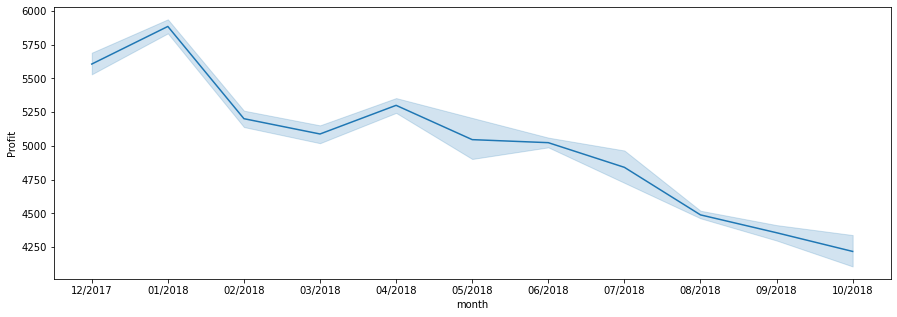

In [5]:
temp_data = data.copy()
temp_data['month'] = pd.to_datetime(temp_data.Date).dt.strftime('%m/%Y')
#temp_data.sort_values(by=['month'], ascending=False, inplace = True)
plt.figure(figsize=(15,5))
ax = sns.lineplot(x = 'month', y = 'Profit', data = temp_data)
ax.invert_xaxis()

Profit seems to be decreasing in 2018 upto october dispite amount being spent for advertising
***

### Question 1:
Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated
***

In [6]:
num_data = data.loc[:,'Comp1 Ads':]
num_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Comp1 Ads,205.0,267.577561,26.219588,208.000,244.000,269.700,284.400,327.70
Comp2 Ads,205.0,271.722439,25.914939,218.600,248.500,274.200,288.800,328.75
Comp3 Ads,205.0,262.990732,26.126704,205.900,240.300,263.250,280.900,321.65
Comp4 Ads,205.0,267.223902,26.238832,210.250,243.050,268.900,284.500,325.95
Comp5 Ads,205.0,267.152683,26.215360,209.200,243.000,268.350,284.450,325.75
Profit,205.0,5059.630234,486.910414,4042.448,4617.695,5088.455,5387.438,6137.80


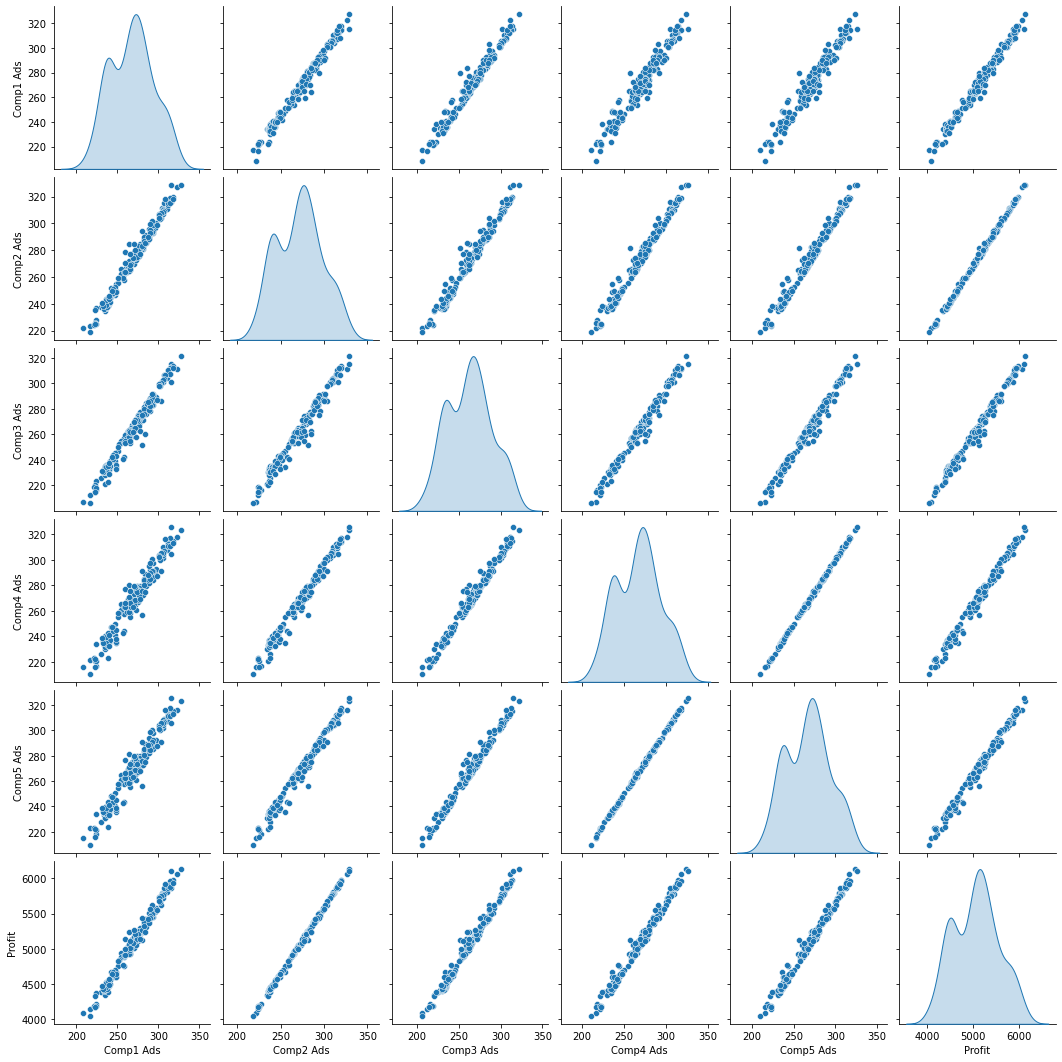

In [7]:
sns.pairplot(data = num_data, diag_kind= 'kde')

<AxesSubplot:>

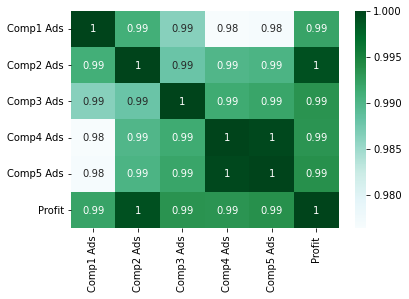

In [8]:
data_corr = num_data.corr()
sns.heatmap(data = data_corr, annot = True, cmap = 'BuGn')

From the pairplot and heatmap following observations can be made: <br> **1.** Profit has a strong linear relationship between amount spent for ads and Profit.<br> **2.** Profit and Company 2 Ads strong '+'ve correalation, it is mandatory in our model.<br> **3.** Since amount spent for Comp4 and Comp5 are strongly correlated either Comp4 or Comp5 can be droped from model or 2 different models can be created.
<br><br>It is further possible to generate predictions via one dimensional models considering high '+'ve correlation between Company ads and profit generated.
***

### Question 2 :
Build a regression model to predict the profit from the given data and comment your findings on it.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
#Model considering only first 4 advetising companies
X = num_data.drop(columns=['Comp5 Ads', 'Profit'], axis=1)
y = num_data['Profit']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=60, test_size=90)
data_compare = pd.DataFrame({'Test Profits':y_test})

In [12]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(f'Model slopes are {model.coef_} and model intercept is {model.intercept_}')

Model slopes are [ 0.90874427 12.48621828  3.5921223   1.79405987] and model intercept is -0.4800428222779374


In [13]:
sales_test_pred = model.predict(X_test)
data_compare['Predicted Profits'] = sales_test_pred

In [14]:
print(f'MSE for the model is {mean_squared_error(y_test, sales_test_pred)}')

MSE for the model is 0.4306381367311158


In [15]:
data_compare.head()

,Test Profits,Predicted Profits
195,5667.250,5667.080089
37,4480.363,4480.260825
92,4763.690,4763.660652
147,5175.051,5175.386684
148,5190.758,5191.251785


<u>**Observations**</u><br>
**1.** The model created has low mean squared error, which means that data points are close to the best fit line and there exit strong linear relationship between predictor and feature space variables.<br>**2.** Further from the results predicted by model it is evident that model will perform as expected when deployed to production and will be able to predit profits from specified advertising spents 
***

### Question 3:
Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
{'Add1(in Thousands)':290, 'Add2(in Thousands)':312, 'Add3(in Thousands)':309, 'Add4(inThousands)':298, 'Add5(in Thousands)':320}

In [16]:
new_data = pd.DataFrame(columns= X_test.columns)
given_sales = [290,312,309,298]
#for value, column in zip(given_sales, new_data.columns):
#    new_data[column] = [value]
new_data.loc[0] = given_sales
new_data

,Comp1 Ads,Comp2 Ads,Comp3 Ads,Comp4 Ads
0,290,312,309,298


In [18]:
print(f'Predicted profit for given data is {model.predict(new_data)}')

Predicted profit for given data is [5803.35153122]


***